# Evaluating the Schrodinger Equation

QWavE was developed to evaluate the Schrodinger Equation using a fourth-order finite difference discretization for simple and arbitrary potentials. Currently, only 1-dimensional potentials are implimented.

## schrodinger_box()

The schrodinger_box.() module evaluates problems of the form:

$$[\frac{-h^{2}}{8\pi^{2}m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$
or
$$[\frac{-1}{2m}\nabla^{2} + V(x)]\psi(x) = E\psi(x)$$ in a.u.

schrodinger_box() takes at minimum two arguments:
<br>&emsp;&emsp;    bl and m (each in atomic units)
<br>    
which will evaluate the schrodinger equation for a particle of mass m, in box with length bl. The box has an infinite potential at the boundaries and no potential within the box. schrodinger_box will return two parameters, which are the eigenvalues and wavefunctions of said particle and box.

In [1]:
from qwave import qwave
from scipy import constants
import numpy as np

bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m)
print(eigen)

## We can check out work by computing the Energy of a particle in a box by hand
h = constants.h/(2*np.pi)
h_j = constants.physical_constants['Hartree energy'][0]
bohr_m = constants.physical_constants['Bohr radius'][0]
au_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg

L = 10 * bohr_m
m = 1 * au_kg
n = 1
print(' ')
En = ((n**2)*(np.pi**2)*(h)**2)/(2*m*(L**2))*(1/h_j)
print(En)

[0.04853222 0.19412837 0.43678675 0.77650396 1.21327401 1.74708716
 2.37792836 3.10577541 3.93059676 4.85234907]
 
0.04934802199448181


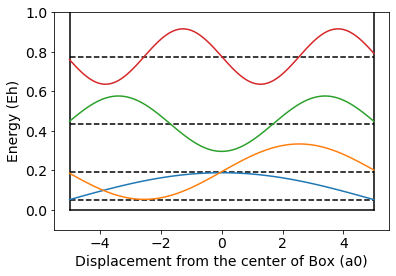

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Create Box
plt.plot(np.linspace(1*bl/2,1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,-1*bl/2,101),np.linspace(0,10,101),color='black')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(0,0,101),color='black')

# Plot first four eigen values
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[0],eigen[0],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[1],eigen[1],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[2],eigen[2],101),color='black',linestyle='dashed')
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),np.linspace(eigen[3],eigen[3],101),color='black',linestyle='dashed')

# Plot the wavefunctions of the first four eigen states
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[0])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[1])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[2])
plt.plot(np.linspace(-1*bl/2,1*bl/2,101),wave[3])
plt.ylim([-0.1,1])
plt.ylabel('Energy (Eh)',size=14)
plt.xlabel('Displacement from the center of Box (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)

plt.show()


schrodinger_box has a total of 7 parameters it can take:
<br>    box_length: 
<br> &emsp;&emsp;      length of box in a.u.
<br>     mass:
<br> &emsp;&emsp;        mass of particle in a.u.
<br>    pot_func:
<br> &emsp;&emsp;        evaluate the S.E. for a potential within the box:
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PIAB (default) - particle in a box
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = 'PARA - particle in a parabola
<br> &emsp;&emsp;&emsp;&emsp;            pot_func = <path to csv file> - particle in an arbitrary potential (described below)
<br>    grid_points:
<br> &emsp;&emsp;        defines the number of grid point to evaluate the S.E. (default = 101)
<br>     len_eigval:
<br> &emsp;&emsp;        defines number of eigenvalues to show (default = 10)
<br>   unit:
<br> &emsp;&emsp;        converts the final eigenvalues out of atomic units
<br> &emsp;&emsp;&emsp;&emsp;             unit = None (default) - Hartree
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'eV'
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'J'
<br> &emsp;&emsp;&emsp;&emsp;             unit = 'kJ/mol'
<br>    plot:
<br> &emsp;&emsp;        plots the potential and eigenstates on the potential (default = False)

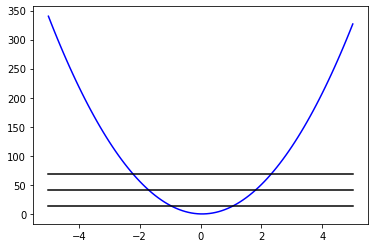

In [3]:
from qwave import qwave
bl = 10     # bohr
m = 1      # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='PARA',
                                   len_eigval = 3, 
                                   unit='eV',
                                   plot=True) # The plot function is only used to see if results are expected

## schrodinger_box() with an arbitrary potential

schrodinger_box() can also read the input from a csv file and evalute the schrodinger equation by interpolating between the points in the csv. The potential is confined to the box, so if your box length should be the length of the potential you provide.

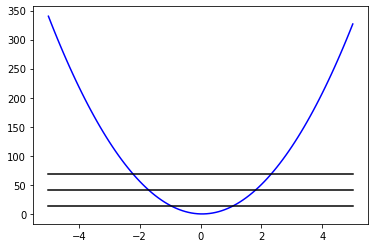

In [4]:
# First, a csv file that is representative of a quadratic function
from qwave import qwave
bl = 10     # bohr
m = 1       # a.u of mass
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='./quadratic.csv',
                                   len_eigval = 3, 
                                   unit='eV',
                                   plot=True) 


As you can see, we get the same answer whether we use the predefined potential or the interpolated potential

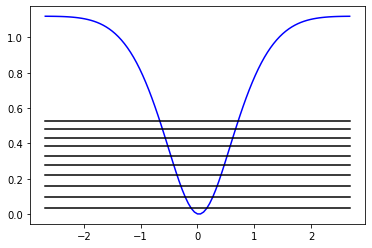

In [5]:
# Next, a csv file that is representative of an arbitarty potential
# NOTE:
# This data was obtained by displacing a carbon atom from the hollow
# site of a Pt(100) surface over the bridge site. The potential is
# reflected at the equilibrium position to mimic the potential well
# the carbon is confined to.

from qwave import qwave
import csv # need to do some data manipulation
from scipy import constants
import numpy as np


bohr_to_m = constants.physical_constants['Bohr radius'][0] # convert from bohr to meter
ang_to_m = constants.physical_constants['Angstrom star'][0] # convert from angstrom to meter

au_to_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg
am_to_kg = constants.physical_constants['atomic mass constant'][0] # convert from am to kg

h_to_eV = constants.physical_constants['Hartree energy in eV'][0] # convert from Eh to eV

x=[] # store data in csv
y=[]

with open('./arbitrary.csv') as csvfile:                # read csvfile
    csvreader = csv.reader( csvfile,delimiter =',')
    for row in csvreader:
        x.append(float(row[0]))
        y.append(float(row[1]))

xdata = np.multiply(x,(ang_to_m/bohr_to_m))
ydata = np.multiply(y,1/h_to_eV)

results = np.vstack((xdata,ydata)).T

np.savetxt('./scaled-arbitrary.csv',results,delimiter=',')

bl = xdata[-1]-xdata[0]      # box length (centered at zerop)
m = 12 * (am_to_kg/au_to_kg) # atomic unit of mass of C atom
eigen,wave = qwave.schrodinger_box(bl,m,
                                   pot_func='./scaled-arbitrary.csv',
                                   len_eigval = 10, 
                                   unit='eV',
                                   plot=True)

As you can see, the potential is fairly harmonic near the center of the box, but dissopates as the potential flattens at ~1.75 Bohr

## schrodinger_HO()

schrodinger_HO() is a special function designed to evaluate the Harmonic oscillator problem. It works exactly like the schrodinger_box() module except this module takes a frequency and works backward to generate the harmonic potential, then evaluates that potential using the methods described above.
<br>
A couple of things to note:
<br> 
1) You must still work in atomic units. You can control the output but these codes only work properly if you start in atomic units
<br>
2) You need to supply the frequency in cm$^{-1}$; the code will do the unit conversions for you
<br>
3) You still need to specify the box length, as it is needed to generate the grid points

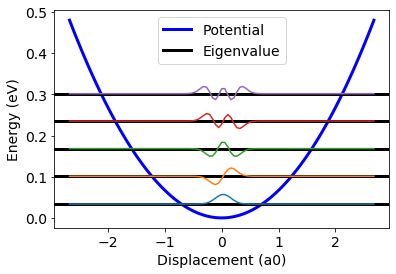

In [6]:
from qwave import qwave
import csv # need to do some data manipulation
from scipy import constants,interpolate
import numpy as np
import matplotlib.pyplot as plt


# lets use some of the data above to make life easier

bl = xdata[-1]-xdata[0]      # box length (centered at zero)
m = 12 * (am_to_kg/au_to_kg) # atomic unit of mass of C atom
freq = 543                   # frequency in cm-1

# Lets repeat the same exercise in the schrodinger_box() module, expect we will provide
# a harmonic potential that corresponds to a potential where the frequency is 543

eigen_Box,wave_Box = qwave.schrodinger_box(bl,
                                            m,
                                            pot_func='./C-Pt-100-HO.csv',
                                            len_eigval = 10, 
                                            unit='eV')

# Now lets evaluate the eigen values using the schidinger_HO() module. Here we do not
# provide any information about the potential. We only provide the frequency.

eigen_HO,wave_HO = qwave.schrodinger_HO(bl,
                                        m,
                                        freq,
                                        len_eigval = 10, 
                                        unit='eV')


# Lets plot the potential from the csv file. Again this csv file is a parabola for a C atom
# with a vibrational frequency of 543 cm-1 along one of its orthoganol degrees of freedom.
# The files is also in a.u. so we will convert the data into eV first.

bohr_to_m = constants.physical_constants['Bohr radius'][0] # convert from bohr to meter
ang_to_m = constants.physical_constants['Angstrom star'][0] # convert from angstrom to meter

au_to_kg = constants.physical_constants['atomic unit of mass'][0]  # convert from au to kg
am_to_kg = constants.physical_constants['atomic mass constant'][0] # convert from am to kg

h_to_eV = constants.physical_constants['Hartree energy in eV'][0] # convert from Eh to eV

x=[] # store data in csv
y=[]

with open('./C-Pt-100-HO.csv') as csvfile:                # read csvfile
    csvreader = csv.reader( csvfile,delimiter =',')
    for row in csvreader:
        x.append(float(row[0]))
        y.append(float(row[1]))
        
xdata = np.array(x)
ydata = np.array(y)

xline = np.linspace(xdata[0],xdata[-1],101)    # interpolate data to mimic what the code is evaluating
cs = interpolate.CubicSpline(xdata,ydata)      
C_HO_V = cs(xline)

plt.plot(xline,C_HO_V,color='blue',linewidth=3) # plot the potential
plt.axhline(eigen_Box[0],color='black',linewidth=3) # plot the first few eigen values from schrodinger_box
plt.axhline(eigen_Box[1],color='black',linewidth=3)
plt.axhline(eigen_Box[2],color='black',linewidth=3)
plt.axhline(eigen_Box[3],color='black',linewidth=3)
plt.axhline(eigen_Box[4],color='black',linewidth=3)
plt.plot(xline,(wave_Box[0]*0.05)+eigen_Box[0])     # also plot the wavefunctions
plt.plot(xline,(wave_Box[1]*0.05)+eigen_Box[1])
plt.plot(xline,(wave_Box[2]*0.05)+eigen_Box[2])
plt.plot(xline,(wave_Box[3]*0.05)+eigen_Box[3])
plt.plot(xline,(wave_Box[4]*0.05)+eigen_Box[4])
plt.ylabel('Energy (eV)',size=14)
plt.xlabel('Displacement (a0)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(['Potential','Eigenvalue'],fontsize=14,loc='upper center')
plt.show()

As you can see, the eigen states are evenly spaced and wavefunctions correspond to the appropriate eigenstate. If we take the difference between any two adjacent eigenstates we should recover the frequence of C on Pt(100)

In [7]:
cm_ev = constants.physical_constants['inverse meter-electron volt relationship'][0]
return_freq = (eigen_Box[1] - eigen_Box[0])*(1/cm_ev)/100
print('{0:.2f} cm-1'.format(return_freq))

542.17 cm-1


Now we can compare the the two modules

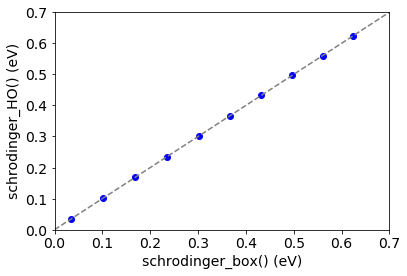

In [8]:
plt.plot(eigen_Box,eigen_HO,'o',color='blue')
plt.plot(np.linspace(0,0.7),np.linspace(0,0.7),color='grey',linestyle='dashed')
plt.xlim(0,0.7)
plt.ylim(0,0.7)
plt.xlabel('schrodinger_box() (eV)',size=14)
plt.ylabel('schrodinger_HO() (eV)',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

As you can see, both give the same answers. The schrodinger_HO module just saves you the extra step of computing the harmonic potential.

We are in the process of adding more modules to the schrodinger equation solver such as rigid rotor, hydrogen atom with an electron, etc. As updates are made more examples will be added here